# HW 2: Clustering and Topic Models [100 points]

Name: Jiaxuan Zhang

Andrew ID: jiaxuanz

Collaborators (if none, say "none"; do *not* leave this blank): none

Reminder: you should not be sharing code.

## Question 1: Clustering emails using Gaussian Mixture Models [50 pts]

For this problem, we will be analyzing emails taken from the [Enron Email Dataset](https://www.cs.cmu.edu/~enron/). Data is provided in the `enron` data directory, with one file per email. The data set includes a combination of "spam" and "ham" emails. Spam emails are unsolicited messages intended to sell a product or scam users into providing personal information, while ham emails represent everything that is not spam. 

The language used in spam emails tends to be considerably different from typical business emails. Most spam filters leverage this difference in word frequencies to detect spam as it arrives and filter it out of email inboxes. We will use Gaussian Mixture Models (GMMs) to cluster the emails and attempt to identify groups of emails which are likely to be spam.

### Part A: Construct a list of processed documents [10 points]

Provided below is a function that returns a document present in a file given a filename. The function performs some preprocessing to (1) remove punctuation, (2),(3) remove whitespace and (4) lowercase all words. Using the `make_word_list` function, construct a list of processed documents.

In [2]:
import re
import string
import codecs

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

In [3]:
import glob
documents = []
for email in glob.glob('./data/enron/*.txt'):
    documents.append(make_word_list(email))
documents

['subject leadership development pilot sally what timing ask and you shall receive as per our discussion listed below is an update on the leadership pilot your vendor selection team will receive an update and even more information later in the week on the lunch learn for energy operations the audience and focus will be your group we are ready to start up when appropriate thank you for your time today please call me if you have any questions at x forwarded by julie armstrong corp enron on pm from susan runkel ect pm to cindy skinner hou ect ect brad mcsherry hou ect ect norma villarreal hou ect ect kimberly rizzi hou ect ect fran l mayes hou ect ect gary buck hou ect ect robert jones corp enron enron sheila walton hou ect ect philip conn corp enron enron mary overgaard pdx ect ect kim melodick hou ect ect valeria a hope hou ect ect cc david oxley hou ect ect susan carrera hou ect ect jane allen hou ect ect christine shenkman enron development enron development kathryn mclean hou ect ect

### Part B: Construct a document matrix [10 points]

Next, construct a document matrix `X` as a matrix of [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features for each document. TF-IDF features encode information about the word frequency within a document, weighted by the frequency of the same word for corpus as a whole.

   - Use the `TfidfVectorizer` from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create the document matrix `X`.
   - Set `min_df=50`; this drops words that don't occur in at least 50 documents.
   - Set `stop_words="english"` and `max_df=0.8` to filter out stop-words.
   - Print the number of unique words in the vocabulary Hint: Look for the `vocabulary_` attribute in the `TfidfVectorizer` object after fitting the vectorizer to the data set. The vocabulary will also be needed in part (d).

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", min_df=50, max_df=0.8)
X = vectorizer.fit_transform(documents).toarray()
X.shape
# len(vectorizer.get_feature_names()) = 1680

raw_count = vectorizer.vocabulary_
# unique_word_list = [word for word, count in raw_count.items() if count == 1]
print('The number of unique words: ')
raw_count
      


The number of unique words: 


{'leadership': 792,
 'development': 378,
 'sally': 1310,
 'timing': 1523,
 'ask': 96,
 'shall': 1360,
 'receive': 1216,
 'discussion': 398,
 'listed': 817,
 'update': 1577,
 'team': 1491,
 'information': 713,
 'later': 785,
 'week': 1634,
 'learn': 795,
 'energy': 463,
 'operations': 1020,
 'focus': 556,
 'group': 618,
 'ready': 1210,
 'start': 1428,
 'appropriate': 87,
 'thank': 1506,
 'time': 1521,
 'today': 1525,
 'questions': 1194,
 'forwarded': 570,
 'corp': 312,
 'enron': 467,
 'pm': 1097,
 'susan': 1478,
 'ect': 439,
 'cindy': 231,
 'hou': 666,
 'robert': 1298,
 'jones': 764,
 'sheila': 1365,
 'mary': 888,
 'kim': 774,
 'hope': 662,
 'cc': 204,
 'david': 344,
 'good': 612,
 'news': 973,
 'regarding': 1231,
 'ena': 459,
 'help': 647,
 've': 1601,
 'performance': 1074,
 'wilson': 1650,
 'products': 1155,
 'primary': 1135,
 'programs': 1164,
 'february': 534,
 'purpose': 1188,
 'fine': 549,
 'materials': 891,
 'present': 1124,
 'just': 769,
 'order': 1028,
 'great': 616,
 'section'

### Part C: Perform Clustering [10 points]

Perform clustering on the document matrix X using GMMs. 
- Use the `GaussianMixture` module from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster the documents.
- Set the number of clusters (mixture components) to 3.
- Print the number of documents assigned to each cluster.

In [4]:
from sklearn.mixture import GaussianMixture

clusters = 3
gmm = GaussianMixture(n_components=clusters, random_state=0)
gmm.fit(X)
gmm_cluster_assignment = gmm.predict(X)
for i in range(clusters):
    print('Cluster %d: %d documents' % (i+1, list(gmm_cluster_assignment).count(i)))


Cluster 1: 363 documents
Cluster 2: 1786 documents
Cluster 3: 3022 documents


### Part D: Characterize the clusters [10 points]

Now, we will attempt to characterize the clusters based on the frequency of spam-relevant words. 
- Select 3 "spammy" words from the vocabulary that you expect to occur frequently in spam emails and less frequently in normal business emails (e.g., 'click', 'www', 'offer'). Construct a list, `spam_indices`, storing the indices of the spammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Select 3 "hammy" words from the vocabulary you think will occur frequently in business emails and infrequently in spam emails (e.g., 'meeting', 'attached', 'review'). Construct a list, `ham_indices`, storing the indices of the hammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Use the function provided below, `plot_spam_words_by_cluster`, to plot the average TF-IDF features for your selected spammy words and hammy words for each cluster. The function takes four parameters:
    - `predicted` is predicted cluster assignments returned by `GaussianMixture.predict()`
    - `n_clusters` is the number of clusters. This should match the number of clusters from your GMM.
    - `spam_indices` is a list of indices of spammy words in the vocabulary.
    - `ham_indices` is a list of indices of hammy (typical business) words in the vocabulary.

In [5]:
def plot_spam_words_by_cluster(predicted, n_clusters, spam_indices, ham_indices):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_spam = []
    mean_tfidf_ham = []
    for spam in spam_indices:
        mean_tfidf_spam.append([])
    for ham in ham_indices:
        mean_tfidf_ham.append([])
    
    for i in range(n_clusters):
        for j, spam_idx in enumerate(spam_indices):
            mean_tfidf_spam[j].append(X[predicted==i, spam_idx].mean())
        for j, ham_idx in enumerate(ham_indices):
            mean_tfidf_ham[j].append(X[predicted==i, ham_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot spam bars
    for i, val in enumerate(mean_tfidf_spam):
        spam_bar = ax.bar(ind - (len(mean_tfidf_spam)-i-1)*width, val, width, color='r', bottom=0)

    # Plot ham bars
    for i, val in enumerate(mean_tfidf_ham):
        ham_bar = ax.bar(ind + (len(mean_tfidf_ham)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster for Spam-Relevant Words')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((spam_bar[0], ham_bar[0]), ('Spammy words', 'Hammy words'))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

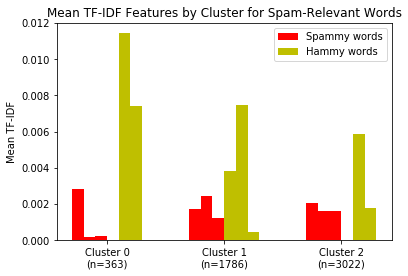

In [6]:
spam_list = ['click', 'earn', 'offer']
ham_list = ['business', 'profit', 'review']
spam_indices = [idx for idx, (word, count) in enumerate(raw_count.items()) if word in spam_list]
ham_indices = [idx for idx, (word, count) in enumerate(raw_count.items()) if word in ham_list]

plot_spam_words_by_cluster(gmm_cluster_assignment, clusters, spam_indices, ham_indices)

### Part E: Interpret results [10 points]

From the plot generated in part (d), do any of the clusters correspond to spam emails, based on the frequency of spammy and hammy words? Do any of the clusters appear to correspond to typical business emails (ham)? 

Re-run your analysis with a different choice for the number of clusters in your GMM (e.g., `n_clusters=5` or `n_clusters=2`). How does changing the number of clusters affect your results? Does one choice of `n_clusters` appear better than another for locating clusters of spam emails?

*** WRITE YOUR ANSWER HERE IN TEXT ***

From the graphs above, all of the three cluster seem to correspond more to ham emails. This is because the tf-idf of the three spam words are relatively low while the three ham words are high. 

After re-running the model in `n_clusters = 2, 3, 4, 5`, the number of clusters did affect my result in either better or worse way. Generally speaking, 3 clusters can work well in this example. 

## Question 2: Latent "Purposes" in Mobile Apps [45 points]


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data [0 points]

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [8]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [9]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)

In [10]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### Part B: Convert each app into a "document" [0 points]

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [11]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.as_matrix()
#del df # uncomment to free up RAM
#del df_perms # uncomment to free up RAM

D:\Code\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Part C: Downweight "stop-words" [2.5 points]

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
X_tfidf_Q2 = transformer.fit_transform(X)


### Part D: Discover 10 "topics" [2.5 points]

   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [13]:
%%time
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, n_jobs=-1, random_state=0)
lda.fit(X)

Wall time: 1min 23s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic [15 points]

Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

   * Topic #i: "your interpretation"

In [15]:
# topic_permission_distribution = np.array([row / row.sum() for row in lda.components_]) 

num_top_permissions = 10

print('Displaying the top %d permissions per topic and their probabilities within the topic...' % num_top_permissions)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx+1, ']', sep='')
    sort_indices = np.argsort(-lda.components_[topic_idx])
    for rank in range(num_top_permissions):
        permission_idx = sort_indices[rank]
        print(permission_columns[permission_idx])
    print()

Displaying the top 10 permissions per topic and their probabilities within the topic...

[Topic 1]
Your location : coarse (network-based) location (D)
Your location : fine (GPS) location (D)
Network communication : full Internet access (D)
Network communication : view network state (S)
Phone calls : read phone state and identity (D)
Services that cost you money : directly call phone numbers (D)
Hardware controls : control vibrator (S)
Network communication : view Wi-Fi state (S)
System tools : send sticky broadcast (S)
Default : access SurfaceFlinger (S)

[Topic 2]
System tools : prevent device from sleeping (D)
Hardware controls : control vibrator (S)
Network communication : full Internet access (D)
Network communication : view Wi-Fi state (S)
System tools : change Wi-Fi state (D)
Network communication : create Bluetooth connections (D)
Network communication : view network state (S)
System tools : disable keylock (D)
System tools : bluetooth administration (D)
System tools : change ne

*** WRITE YOUR ANSWER HERE IN TEXT ***

From the permission above, there are several topics which have meaningful permissions. For example, topic 1 and 4 are related to some communicating application such as making a phone call or SMS messages. Topic 2 is related to some connecting application such as bluetooth in music. Topic 3 is related to google-relevant applications. 

### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic [15 points]

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [16]:
app_topic_matrix = lda.transform(X)

for i in range(num_topics):
    sorted_app_idx = np.argsort(-app_topic_matrix[:,i]) # sort the app started from highest probability assigned to topic i
    sorted_app_idx_bigger_than_100000 = [idx for idx in sorted_app_idx if app_ratings[idx] >= 100000] # filter the app idx 
    print('For topic %d, the top 3 apps is: ' % (i+1))
    for rank in range(3):
        app_idx = sorted_app_idx_bigger_than_100000[rank]
        print(app_names[app_idx])
    print()
    

For topic 1, the top 3 apps is: 
Toss It
Paper Toss
GasBuddy

For topic 2, the top 3 apps is: 
PowerAMP Music Player (Trial)
Pandora?? internet radio
Pandora® internet radio

For topic 3, the top 3 apps is: 
Angry Birds Seasons
Yoo Ninja! Free
Adobe Reader

For topic 4, the top 3 apps is: 
Gmail
Facebook for Android
Yahoo! Mail

For topic 5, the top 3 apps is: 
ColorNote Notepad Notes
Advanced Task Killer
Bible

For topic 6, the top 3 apps is: 
Wallpapers HD
Strip Poker
Backgrounds HD Wallpapers

For topic 7, the top 3 apps is: 
Brightest Flashlight Free™
Brightest Flashlight Free???
TweetCaster for Twitter

For topic 8, the top 3 apps is: 
Vaulty Free Hides Pictures
Live Holdem Poker Pro
Racing Moto

For topic 9, the top 3 apps is: 
TuneIn Radio
Restaurant Story™
Restaurant Story???

For topic 10, the top 3 apps is: 
Ringdroid
GO Launcher EX
Zedge Ringtones & Wallpapers



### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE [10 points]

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

In [17]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, learning_rate=50, init='pca', random_state=0, angle=0.99)
feature_vectors_tsne2d = tsne.fit_transform(app_topic_matrix[:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.003s...
[t-SNE] Computed neighbors for 2000 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.454327
[t-SNE] KL divergence after 1000 iterations: 0.266927
Wall time: 8.42 s


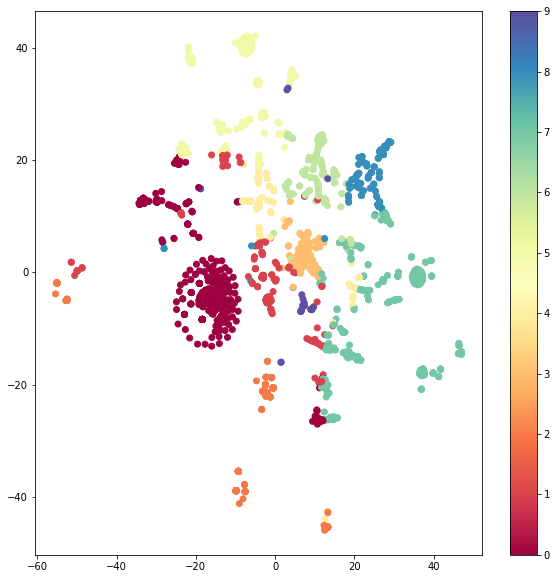

In [18]:
topic_label = np.zeros(2000)
for app_idx in range(2000):
    sort_indices = np.argsort(-app_topic_matrix[app_idx])
    topic_label[app_idx] = sort_indices[0]

plt.figure(figsize=(10,10))
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=[i for i in topic_label], cmap='Spectral')
plt.colorbar()

## Question 3: Questionnaire [5 points]

Please answer this survey after you have done this homework: https://forms.gle/rMSREZSd96GbQNoT8